# Biodiversity data from the National Parks Service

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:


- What is the distribution of conservation_status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

In [116]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Loading Data
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [117]:
# First look to dataframe
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [118]:
# First look to dataframe
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Distribution of overall conservation_status

In [119]:
# Replacing NaN with 'Not Threat'
species.conservation_status = species.conservation_status.fillna('No Threat')
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Threat
1,Mammal,Bos bison,"American Bison, Bison",No Threat
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Threat
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Threat
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Threat
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Threat
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Threat
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [120]:
# Adding Plants filter and splitting df in animals and plants in different df
species.loc[species['category'].str.contains(' Plant'), 'Plant'] = True
species.Plant = species.Plant.fillna(False)
animals = species[species.Plant==False].drop(columns='scientific_name')
plants = species[species.Plant==True].drop(columns='scientific_name')

In [121]:
animals.head()

,category,common_names,conservation_status,Plant
0,Mammal,Gapper's Red-Backed Vole,No Threat,False
1,Mammal,"American Bison, Bison",No Threat,False
2,Mammal,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Threat,False
3,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Threat,False
4,Mammal,Wapiti Or Elk,No Threat,False


In [122]:
plants.head()

,category,common_names,conservation_status,Plant
574,Vascular Plant,Sweetflag,No Threat,True
575,Vascular Plant,Water-Plantain,No Threat,True
576,Vascular Plant,Longbeak Arrowhead,No Threat,True
577,Vascular Plant,Broad-Leaved Arrowhead,No Threat,True
578,Vascular Plant,Green Dragon,No Threat,True


In [123]:
#Dropping plants filter on both df
animals = animals.drop(columns='Plant')
plants = plants.drop(columns='Plant')

In [124]:
# Grouping by 'conservation_status' & 'category'
grouped_animals = animals.groupby(['conservation_status','category'], as_index=False)\
    .agg(count=('common_names', 'count'))\
    .sort_values(['category','conservation_status']).reset_index(drop=True)

grouped_animals

,conservation_status,category,count
0,Endangered,Amphibian,1
1,No Threat,Amphibian,73
2,Species of Concern,Amphibian,4
3,Threatened,Amphibian,2
4,Endangered,Bird,4
5,In Recovery,Bird,3
6,No Threat,Bird,442
7,Species of Concern,Bird,72
8,Endangered,Fish,3
9,No Threat,Fish,116


In [125]:
grouped_plants = plants.groupby(['conservation_status','category'], as_index=False)\
    .agg(count=('common_names', 'count'))\
    .sort_values('category').reset_index(drop=True)
grouped_plants

,conservation_status,category,count
0,No Threat,Nonvascular Plant,328
1,Species of Concern,Nonvascular Plant,5
2,Endangered,Vascular Plant,1
3,No Threat,Vascular Plant,4424
4,Species of Concern,Vascular Plant,43
5,Threatened,Vascular Plant,2


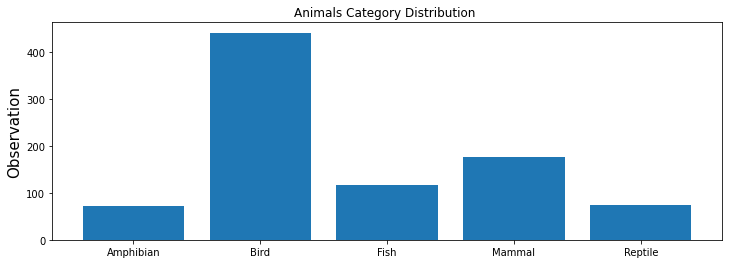

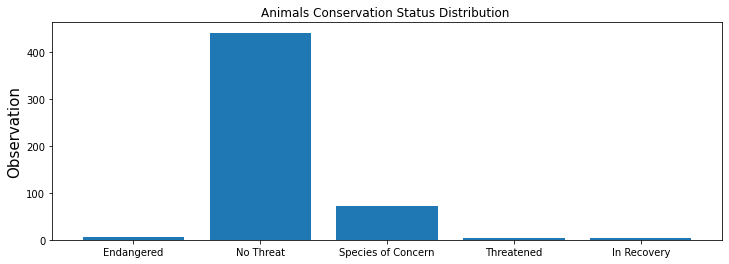

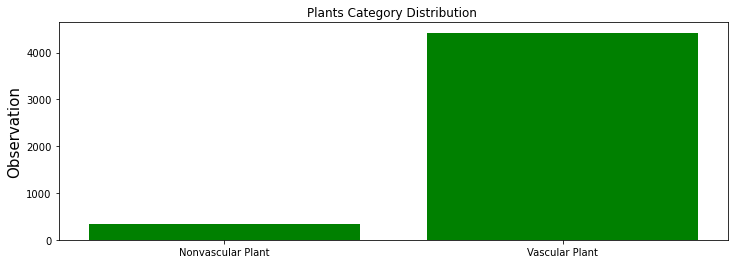

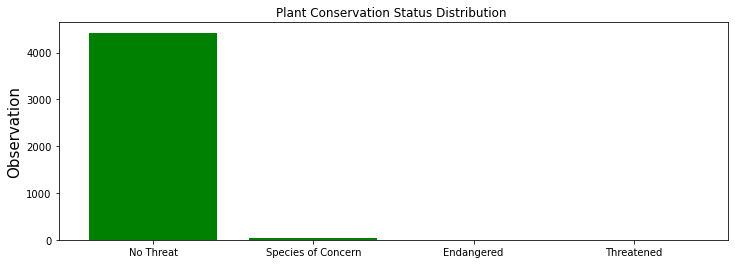

In [126]:
# Animals Categories Distribution
plt.figure(figsize=(12,4))

plt.bar(x='category', height='count', data=grouped_animals)
plt.title('Animals Category Distribution ')
plt.ylabel('Observation', size=15)
plt.show()


# Animals Conservation Status Distribution
plt.figure(figsize=(12,4))
plt.bar(x='conservation_status', height='count', data=grouped_animals)
plt.title('Animals Conservation Status Distribution ')
plt.ylabel('Observation', size=15)
plt.show()


# Plants Categories Distribution
plt.figure(figsize=(12,4))
plt.bar(x='category', height='count', data=grouped_plants, color='green')
plt.title('Plants Category Distribution ')
plt.ylabel('Observation', size=15)
plt.show()

# Plants Conservation Status Distribution
plt.figure(figsize=(12,4))
plt.bar(x='conservation_status', height='count', data=grouped_plants, color='green')
plt.title('Plant Conservation Status Distribution ')
plt.ylabel('Observation', size=15)
plt.show()

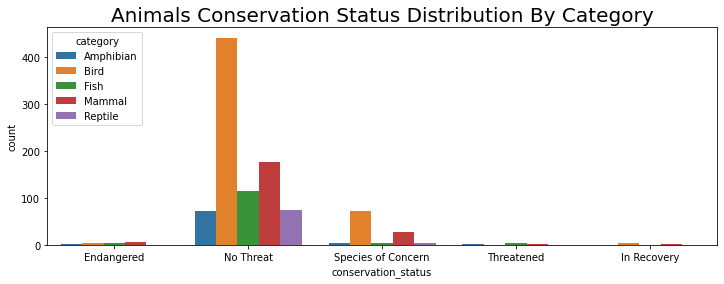

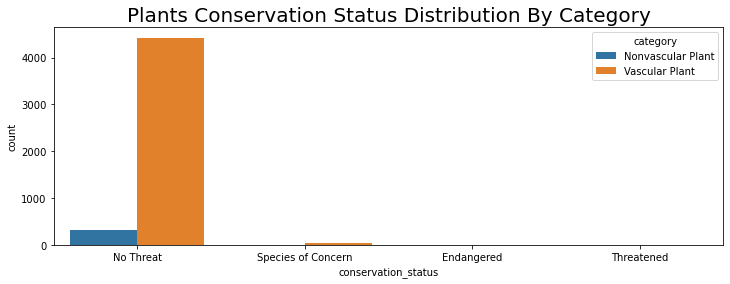

In [127]:
fig = plt.figure(figsize=(12,4))
sns.barplot(x='conservation_status', y='count', hue='category', data=grouped_animals)
plt.title('Animals Conservation status distribution by category'.title(), size=20)
plt.show()


fig = plt.figure(figsize=(12,4))
sns.barplot(x='conservation_status', y='count', hue='category',data=grouped_plants)
plt.title('Plants Conservation status distribution by category'.title(), size=20)

plt.show()

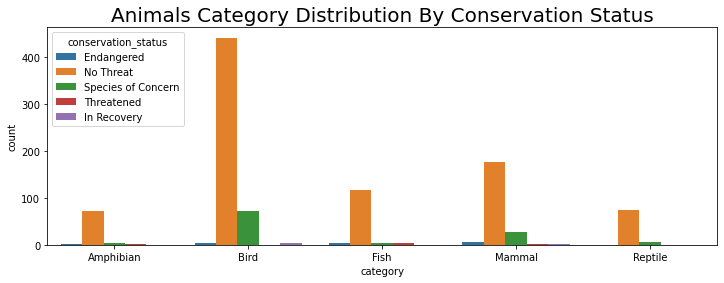

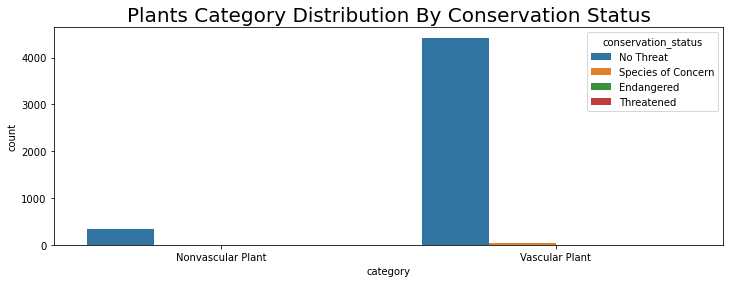

In [128]:
fig = plt.figure(figsize=(12,4))
sns.barplot(x='category', y='count', hue='conservation_status', data=grouped_animals)
plt.title('Animals Category distribution by Conservation status'.title(), size=20)
plt.show()
fig = plt.figure(figsize=(12,4))
sns.barplot(x='category', y='count', hue='conservation_status', data=grouped_plants)
plt.title('Plants Category distribution by Conservation status'.title(), size=20)
plt.show()

### Animals Conservation Status Analisys 

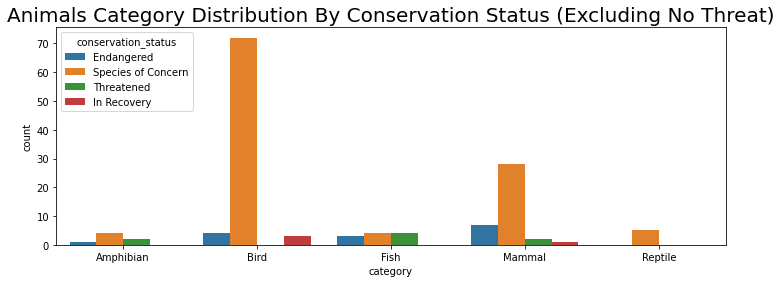

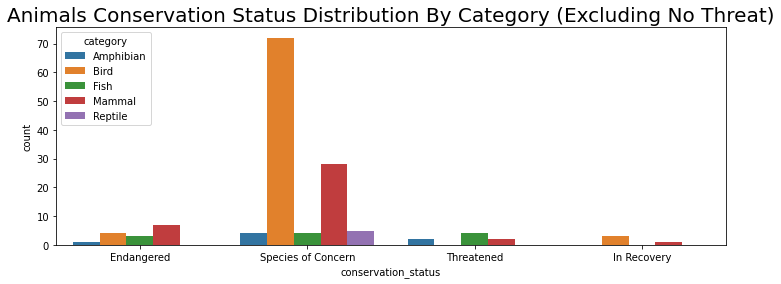

In [129]:
#Plotting again Animals Category Distrubtion removing rows with conservation_status == No Threat
grouped_animals_nothreat = grouped_animals[grouped_animals.conservation_status!='No Threat']

fig = plt.figure(figsize=(12,4))
sns.barplot(x='category', y='count', hue='conservation_status', data=grouped_animals_nothreat)
plt.title('Animals Category distribution by Conservation status (excluding No Threat)'.title(), size=20)
plt.show()


fig = plt.figure(figsize=(12,4))
sns.barplot(x='conservation_status', y='count', hue='category', data=grouped_animals_nothreat)
plt.title('Animals conservation status distribution by category (excluding No Threat)'.title(), size=20)
plt.show()

In [130]:
# Generating 2 (Total and 'At Risk') grouped df and merging them to calculate percentage of 'At risk' observed species for each category
grouped_nothreat_sum = grouped_animals_nothreat\
    .groupby('category')\
    .agg(count=('count', 'sum'))


# Low Risk
grouped_animals_lowthreat= grouped_animals_nothreat[grouped_animals_nothreat['conservation_status']\
    .str.contains('In Recovery|Endangered')==False]\
    .sort_values('conservation_status')

grouped_lowthreat_sum = grouped_animals_lowthreat\
    .groupby('category')\
    .agg(count=('count', 'sum'))


# High Risk 
grouped_animals_highthreat = grouped_animals_nothreat[grouped_animals_nothreat['conservation_status']\
    .str.contains('In Recovery|Endangered')==True]\
    .sort_values('conservation_status')

grouped_highthreat_sum = grouped_animals_highthreat\
    .groupby('category')\
    .agg(count=('count', 'sum'))

In [131]:
grouped_sum = grouped_animals.groupby('category').agg(Total=('count', 'sum'))
grouped_sum['Total at Risk']  = grouped_nothreat_sum['count']
grouped_sum['% At Risk'] = round(grouped_sum['Total at Risk'] / grouped_sum['Total'],4)*100
grouped_sum['At High Risk']  = grouped_highthreat_sum['count']
grouped_sum['At Low Risk']  = grouped_lowthreat_sum['count']
grouped_sum = grouped_sum.fillna(0).astype(float).sort_values('% At Risk', ascending=False)
grouped_sum

,Total,Total at Risk,% At Risk,At High Risk,At Low Risk
category,,,,,
Mammal,214.0,38.0,17.76,8.0,30.0
Bird,521.0,79.0,15.16,7.0,72.0
Amphibian,80.0,7.0,8.75,1.0,6.0
Fish,127.0,11.0,8.66,3.0,8.0
Reptile,79.0,5.0,6.33,0.0,5.0


In [132]:
grouped_conservation = animals[animals.conservation_status != "No Threat"]\
    .groupby(["conservation_status", "category"])['common_names']\
    .count()\
    .unstack()\
    .fillna(0)

grouped_conservation


category,Amphibian,Bird,Fish,Mammal,Reptile
conservation_status,,,,,
Endangered,1.0,4.0,3.0,7.0,0.0
In Recovery,0.0,3.0,0.0,1.0,0.0
Species of Concern,4.0,72.0,4.0,28.0,5.0
Threatened,2.0,0.0,4.0,2.0,0.0


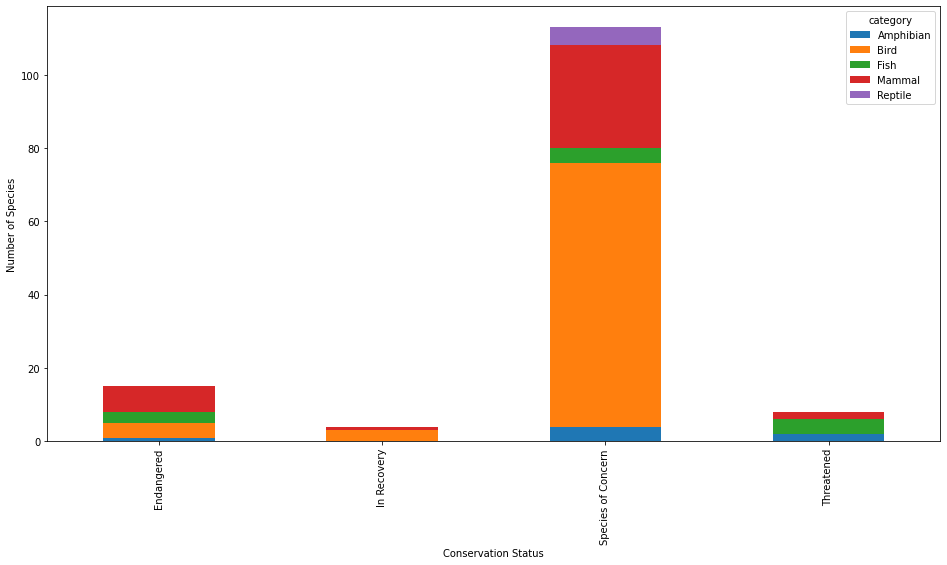

In [133]:
ax = grouped_conservation.plot(kind = 'bar', figsize=(16,8), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

### Plants Conservation Status Analisys 

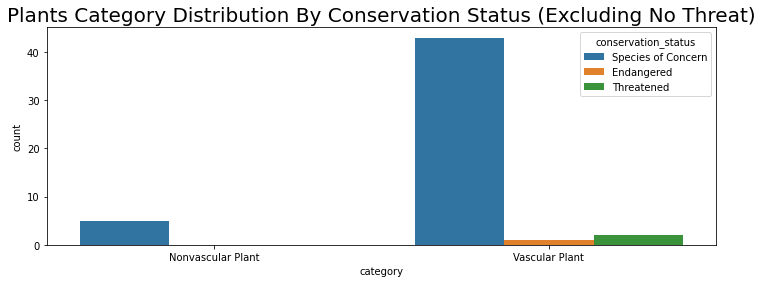

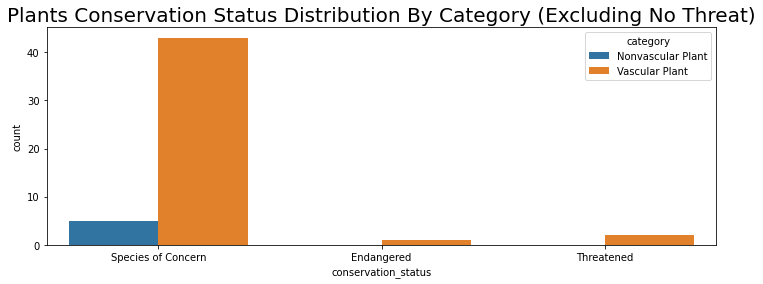

In [134]:
grouped_plants_nothreat = grouped_plants[grouped_plants.conservation_status!='No Threat']

fig = plt.figure(figsize=(12,4))
sns.barplot(x='category', y='count', hue='conservation_status', data=grouped_plants_nothreat)
plt.title('Plants Category distribution by Conservation status (excluding No Threat)'.title(), size=20)
plt.show()


fig = plt.figure(figsize=(12,4))
sns.barplot(x='conservation_status', y='count', hue='category', data=grouped_plants_nothreat)
plt.title('Plants conservation status distribution by category (excluding No Threat)'.title(), size=20)
plt.show()

In [135]:
# Generating 2 grouped df and merging them to calculate pertange of 'At risk' observed species for each category
grouped_plants_nothreat_sum = grouped_plants_nothreat\
    .groupby('category')\
    .agg(count=('count', 'sum'))

grouped_plants_lowthreat= grouped_plants_nothreat[grouped_plants_nothreat['conservation_status']\
    .str.contains('In Recovery|Endangered')==False]\
    .sort_values('conservation_status')

grouped_plants_lowthreat_sum = grouped_plants_lowthreat\
    .groupby('category')\
    .agg(count=('count', 'sum'))

grouped_plants_highthreat = grouped_plants_nothreat[grouped_plants_nothreat['conservation_status']\
    .str.contains('In Recovery|Endangered')==True]\
    .sort_values('conservation_status')

grouped_plants_highthreat_sum = grouped_plants_highthreat\
    .groupby('category')\
    .agg(count=('count', 'sum'))

In [136]:
grouped_plants_sum = grouped_plants.groupby('category').agg(Total=('count', 'sum'))
grouped_plants_sum['Total at Risk']  = grouped_plants_nothreat_sum['count']
grouped_plants_sum['At High Risk']  = grouped_plants_highthreat_sum['count']
grouped_plants_sum['At Low Risk']  = grouped_plants_lowthreat_sum['count']
grouped_plants_sum['% At Risk'] = round(grouped_plants_sum['Total at Risk'] / grouped_plants_sum['Total'],4)*100
grouped_plants_sum = grouped_plants_sum\
    .fillna(0)\
    .astype(float)\
    .sort_values('% At Risk', ascending=False)

grouped_plants_sum

,Total,Total at Risk,At High Risk,At Low Risk,% At Risk
category,,,,,
Nonvascular Plant,333.0,5.0,0.0,5.0,1.50
Vascular Plant,4470.0,46.0,1.0,45.0,1.03


### Category/Conservation Status Analisys Overall 'At Risk' Distribution & Conclusions

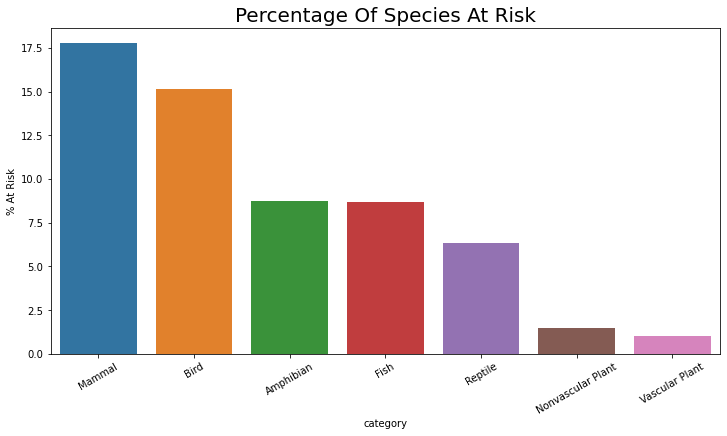

,category,Total,Safe,Total at Risk,At High Risk,At Low Risk,% At Risk
0,Mammal,214.0,176.0,38.0,8.0,30.0,17.76
1,Bird,521.0,442.0,79.0,7.0,72.0,15.16
2,Amphibian,80.0,73.0,7.0,1.0,6.0,8.75
3,Fish,127.0,116.0,11.0,3.0,8.0,8.66
4,Reptile,79.0,74.0,5.0,0.0,5.0,6.33
5,Nonvascular Plant,333.0,328.0,5.0,0.0,5.0,1.50
6,Vascular Plant,4470.0,4424.0,46.0,1.0,45.0,1.03


In [137]:
# Merging two dataframes to finalize our analisys and plot 'AtRisk %' for each category
grouped_total_sum = pd.concat([grouped_plants_sum, grouped_sum]).sort_values('% At Risk', ascending =False).reset_index()
plt.figure(figsize=(12,6))
ax = sns.barplot(y='% At Risk', x='category', data=grouped_total_sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Percentage of species at risk'.title(), size=20)
plt.show()
grouped_total_sum['Safe'] = grouped_total_sum['Total'] - grouped_total_sum['Total at Risk']
grouped_total_sum= grouped_total_sum.reindex(columns=['category', 'Total','Safe','Total at Risk', 'At High Risk', 'At Low Risk','% At Risk',])
grouped_total_sum

### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for `Birds` and `Mammal`



In [138]:
from scipy.stats import chi2_contingency

# `Birds` and `Mammal`
contingency1 = [[38, 176],
              [79, 442]]
chi2_contingency(contingency1)


(0.5810483277947567,
 0.445901703047197,
 1,
 array([[ 34.06530612, 179.93469388],
        [ 82.93469388, 438.06530612]]))

In [139]:
# p-value is the 2nd output of our chi squared test 
print('p-value is ' + str(chi2_contingency(contingency1)[1]))

p-value is 0.445901703047197


The results from the chi-squared test returns many values, the second value which is 0.44 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.44 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables are independent. 

The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|


In [140]:
# `Reptiles` and `Mammal`
contingency2 = [[38, 176],
              [5, 74]]
chi2_contingency(contingency2)

(5.139702724228909,
 0.02338465214871547,
 1,
 array([[ 31.40614334, 182.59385666],
        [ 11.59385666,  67.40614334]]))

In [141]:
print('p-value is ' + str(chi2_contingency(contingency2)[1]))

p-value is 0.02338465214871547



This time the p-value is 0.023 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

### Species in Parks

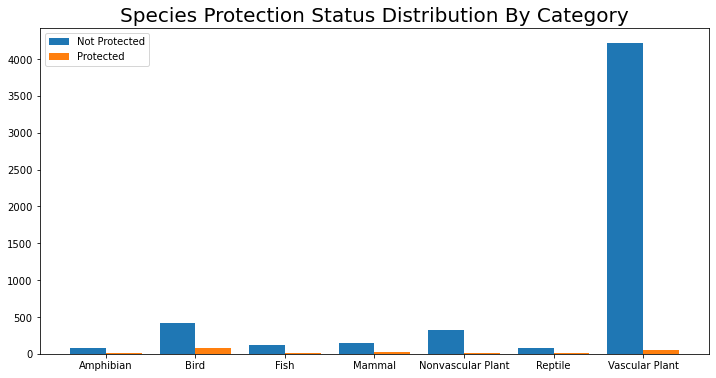

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [157]:
#Adding column with 'is_protected' flag True if the conservatin_status != from No Threat
species['is_protected'] = species.conservation_status != 'No Threat'
#Grouping by category and is_protected and creating pivot table
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

x_axis = np.arange(len(category_counts.category))

# Multi bar Chart
not_protected = category_counts.not_protected
protected = category_counts.protected
plt.figure(figsize=(12,6))
plt.bar(x_axis -0.2, not_protected, width=0.4, label = 'Not Protected')
plt.bar(x_axis +0.2, protected, width=0.4, label = 'Protected')

# Xticks
plt.xticks(x_axis, category_counts.category)

# Add legend
plt.legend()
plt.title('Species protection status distribution by category'.title(), size=20)
# Display
plt.show()

category_counts


In [143]:
mammals=species[species.category=='Mammal']
mammals

from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:10]



[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf']]

In [144]:
cleanRows = []
# converting list of words to dict keys, that don't support duplicates to be inserted, to remove duplicates words
for item in common_Names:
    
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:10]

# This method use chain.from_iterable to check if the given item is a list and return iterable if True, the single word if False
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

# This method simply uses 2 for loops to append every item to an empty list
final_list = []
for items in cleanRows:
    for item in items:
        final_list.append(item)
        
s1 = pd.Series(final_list)
s2 = pd.Series(res)


In [145]:
s1.value_counts()


Bat            23
Shrew          18
Myotis         17
Mouse          16
Chipmunk       13
               ..
House           1
Stones          1
WhiteFooted     1
Cotton          1
BroadFooted     1
Length: 204, dtype: int64

In [146]:
s2.value_counts()

Bat            23
Shrew          18
Myotis         17
Mouse          16
Chipmunk       13
               ..
House           1
Stones          1
WhiteFooted     1
Cotton          1
BroadFooted     1
Length: 204, dtype: int64

In [147]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)
species.head(10)

,category,scientific_name,common_names,conservation_status,Plant,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Threat,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Threat,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Threat,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Threat,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Threat,False,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Threat,False,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Threat,False,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,False,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,False,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,False,True,False


In [148]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,Plant,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Threat,False,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,False,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,False,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Threat,False,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Threat,False,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,False,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,False,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,False,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,False,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Threat,False,False,True


In [150]:
# Next the results of the bat species will be merged with `observations` to create a `DataFrame`
# with observations of bats across the four national parks.  

bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,Plant,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,False,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,False,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,False,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,False,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Threat,False,False,True
...,...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,False,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,False,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,False,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,False,True,True


In [151]:
# Bats observed for each park
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [152]:
# Bats observation by park and protection status 
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


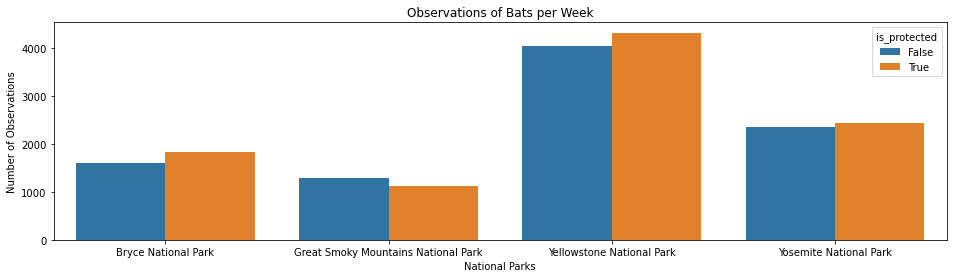

In [153]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.
